# Problem Statement

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [3]:
Fraud = pd.read_csv("Fraud_check.csv")

In [4]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


<b>Data Description :</b>

<b>Undergrad :</b> person is under graduated or not

<b>Marital.Status :</b> marital status of a person

<b>Taxable.Income :</b> Taxable income is the amount of how much tax an individual owes to the government 

<b>Work Experience :</b> Work experience of an individual person

<b>Urban :</b> Whether that person belongs to urban area or not


In [5]:
Fraud.shape

(600, 6)

In [6]:
Fraud.size

3600

In [7]:
#Descriptive Statistics
Fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
#Checking null values
Fraud.isnull()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [10]:
Fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

There are no null values

In [11]:
#Checking duplicate values
Fraud.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [12]:
Fraud.duplicated().sum()

0

There are no duplicate values as well.

In [13]:
#Correlation
Fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


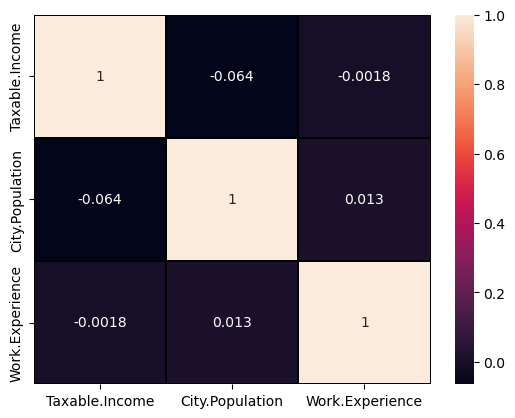

In [14]:
#Visualizing Correlation
sns.heatmap(Fraud.corr(), annot=True, linecolor='black', linewidths=0.3)
plt.show()

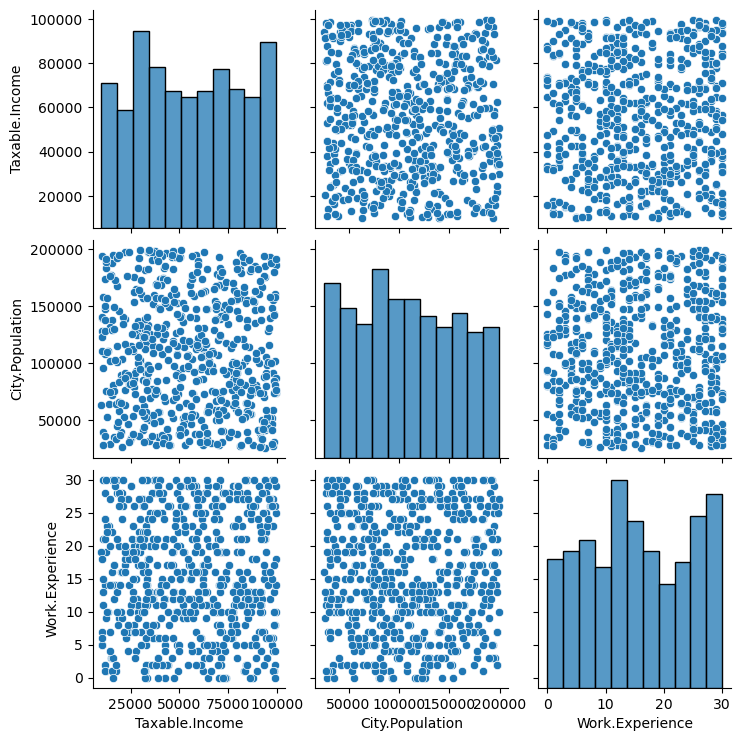

In [15]:
sns.pairplot(Fraud)
plt.show()

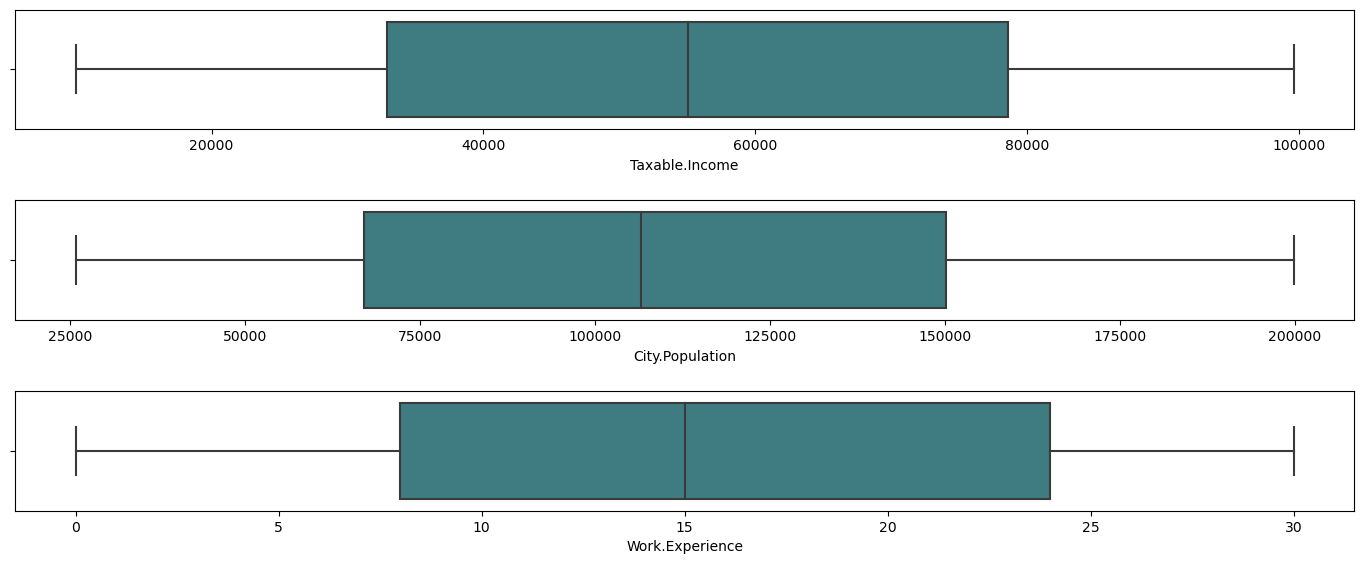

In [16]:
#Lets check outliers with help of box plots
figure, axes = plt.subplots(3,1,figsize=(14,6))
sns.boxplot(x="Taxable.Income", data=Fraud, palette='crest', ax=axes[0])
sns.boxplot(x='City.Population', data=Fraud, palette='crest', ax=axes[1])
sns.boxplot(x='Work.Experience', data=Fraud, palette='crest', ax=axes[2])
plt.tight_layout(pad=2.0)

There are no outliers

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


YES    312
NO     288
Name: Undergrad, dtype: int64

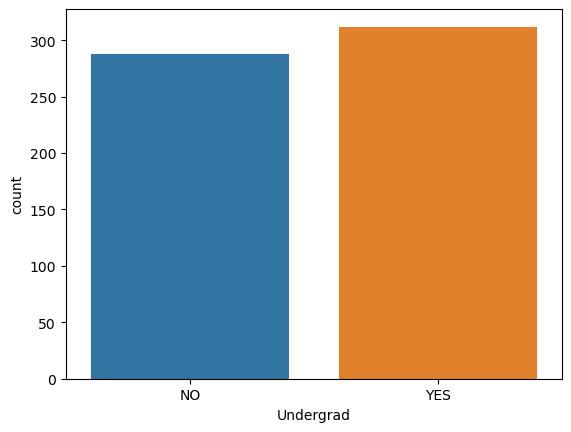

In [17]:
sns.countplot(Fraud['Undergrad'])
Fraud['Undergrad'].value_counts()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64


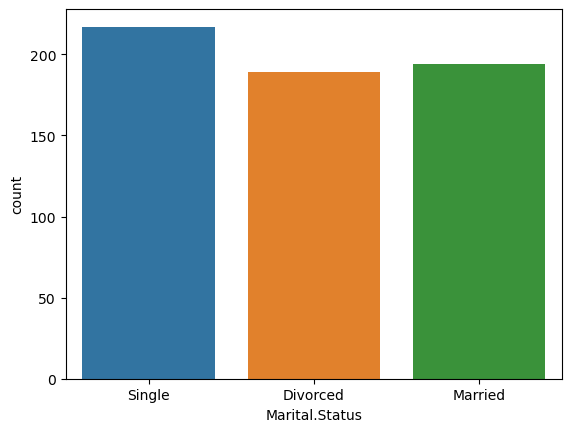

In [18]:
sns.countplot(Fraud['Marital.Status'])
print(Fraud['Marital.Status'].value_counts())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


YES    302
NO     298
Name: Urban, dtype: int64


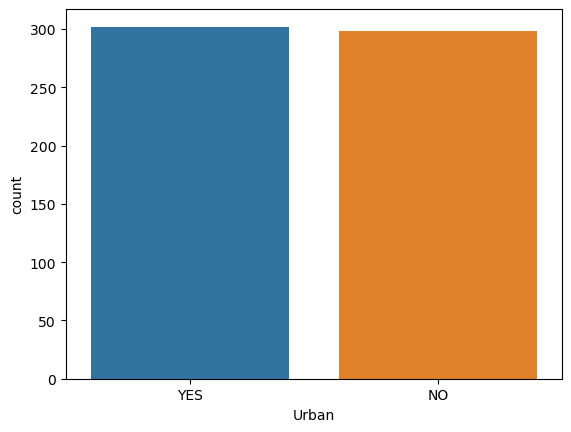

In [19]:
sns.countplot(Fraud['Urban'])
print(Fraud["Urban"].value_counts())

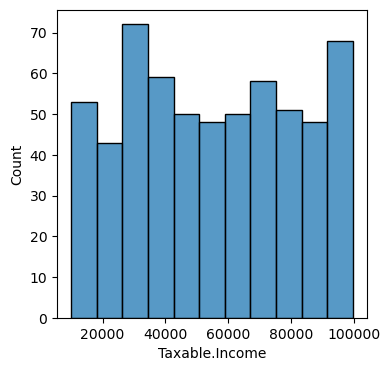

In [20]:
plt.figure(figsize=(4,4))
sns.histplot(Fraud['Taxable.Income'])
plt.show()

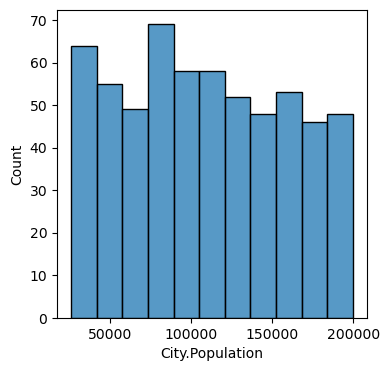

In [21]:
plt.figure(figsize=(4,4))
sns.histplot(Fraud['City.Population'])
plt.show()

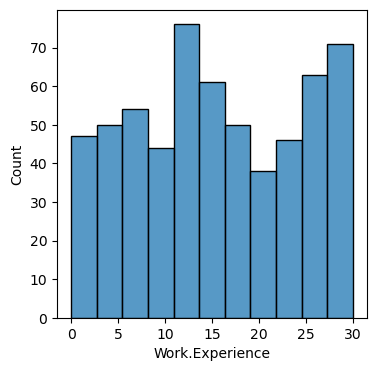

In [22]:
plt.figure(figsize=(4,4))
sns.histplot(Fraud['Work.Experience'])
plt.show()

## As per the statement assuming that , taxable_income <= 30000 as "Risky" and others are "Good"

In [23]:
#Creating new column TaxInc to categorize as risky or good on basis of [10002 (min), 30000, 99620 (max)]
Fraud["TaxInc"] = pd.cut(Fraud['Taxable.Income'], bins=[10002, 30000, 99620], labels = ["Risky", "Good"])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Good     476
Risky    124
Name: TaxInc, dtype: int64


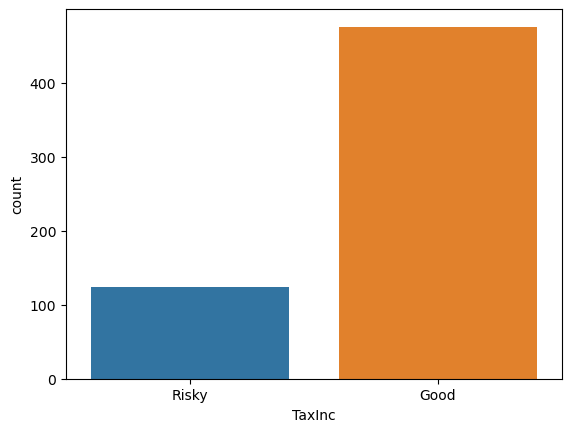

In [24]:
sns.countplot(Fraud['TaxInc'])
print(Fraud['TaxInc'].value_counts())

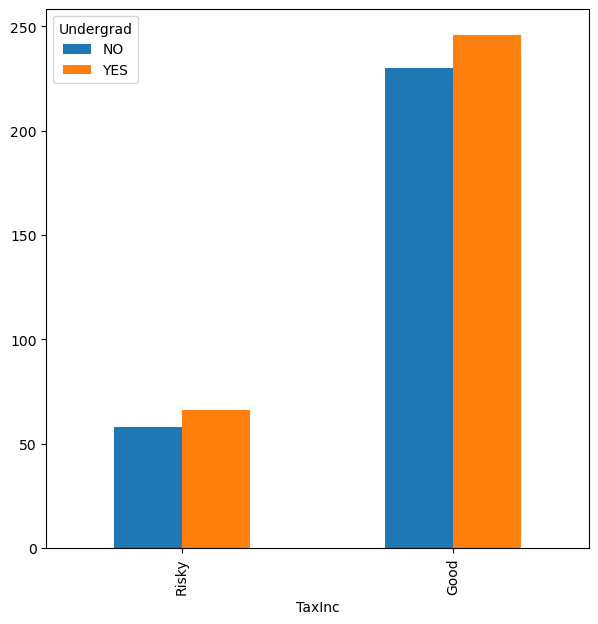

In [25]:
pd.crosstab(Fraud['TaxInc'], Fraud['Undergrad']).plot(kind='bar', figsize=(7,7))
plt.show()

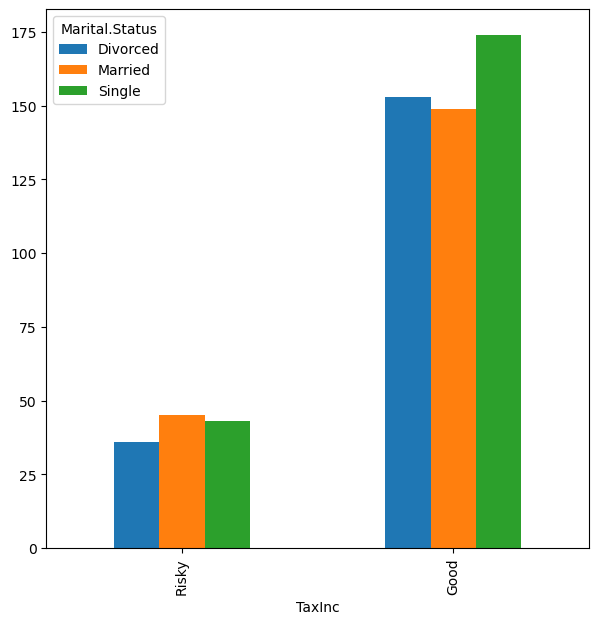

In [26]:
pd.crosstab(Fraud['TaxInc'],Fraud['Marital.Status']).plot(kind='bar', figsize=(7,7))
plt.show()

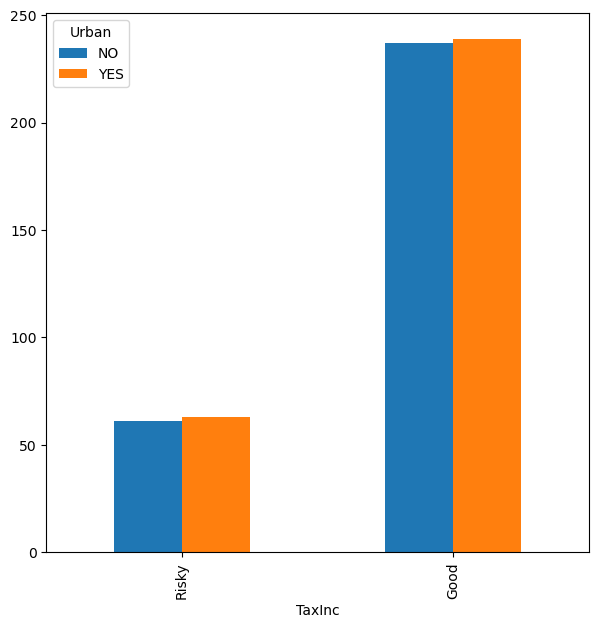

In [27]:
pd.crosstab(Fraud['TaxInc'],Fraud['Urban']).plot(kind='bar', figsize=(7,7))
plt.show()

## Getting dummy variables

In [28]:
#Creating dummy variables for Undergrad , Marital.Status , Urban
# Dropping first dummy variable, to help reducing dimensionality

Fraud = pd.get_dummies(Fraud, columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [29]:
Fraud

,Taxable.Income,City.Population,Work.Experience,TaxInc,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,Good,0,0,1,1
1,33700,134075,18,Good,1,0,0,1
2,36925,160205,30,Good,0,1,0,1
3,50190,193264,15,Good,1,0,1,1
4,81002,27533,28,Good,0,1,0,0
...,...,...,...,...,...,...,...,...
595,76340,39492,7,Good,1,0,0,1
596,69967,55369,2,Good,1,0,0,1
597,47334,154058,0,Good,0,0,0,1
598,98592,180083,17,Good,1,1,0,0


In [30]:
Fraud.head()

,Taxable.Income,City.Population,Work.Experience,TaxInc,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,Good,0,0,1,1
1,33700,134075,18,Good,1,0,0,1
2,36925,160205,30,Good,0,1,0,1
3,50190,193264,15,Good,1,0,1,1
4,81002,27533,28,Good,0,1,0,0


In [31]:
#Getting dummies of TaxInc
Fraud = pd.get_dummies(Fraud, columns=["TaxInc"], drop_first=True)

In [32]:
Fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [33]:
Fraud.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


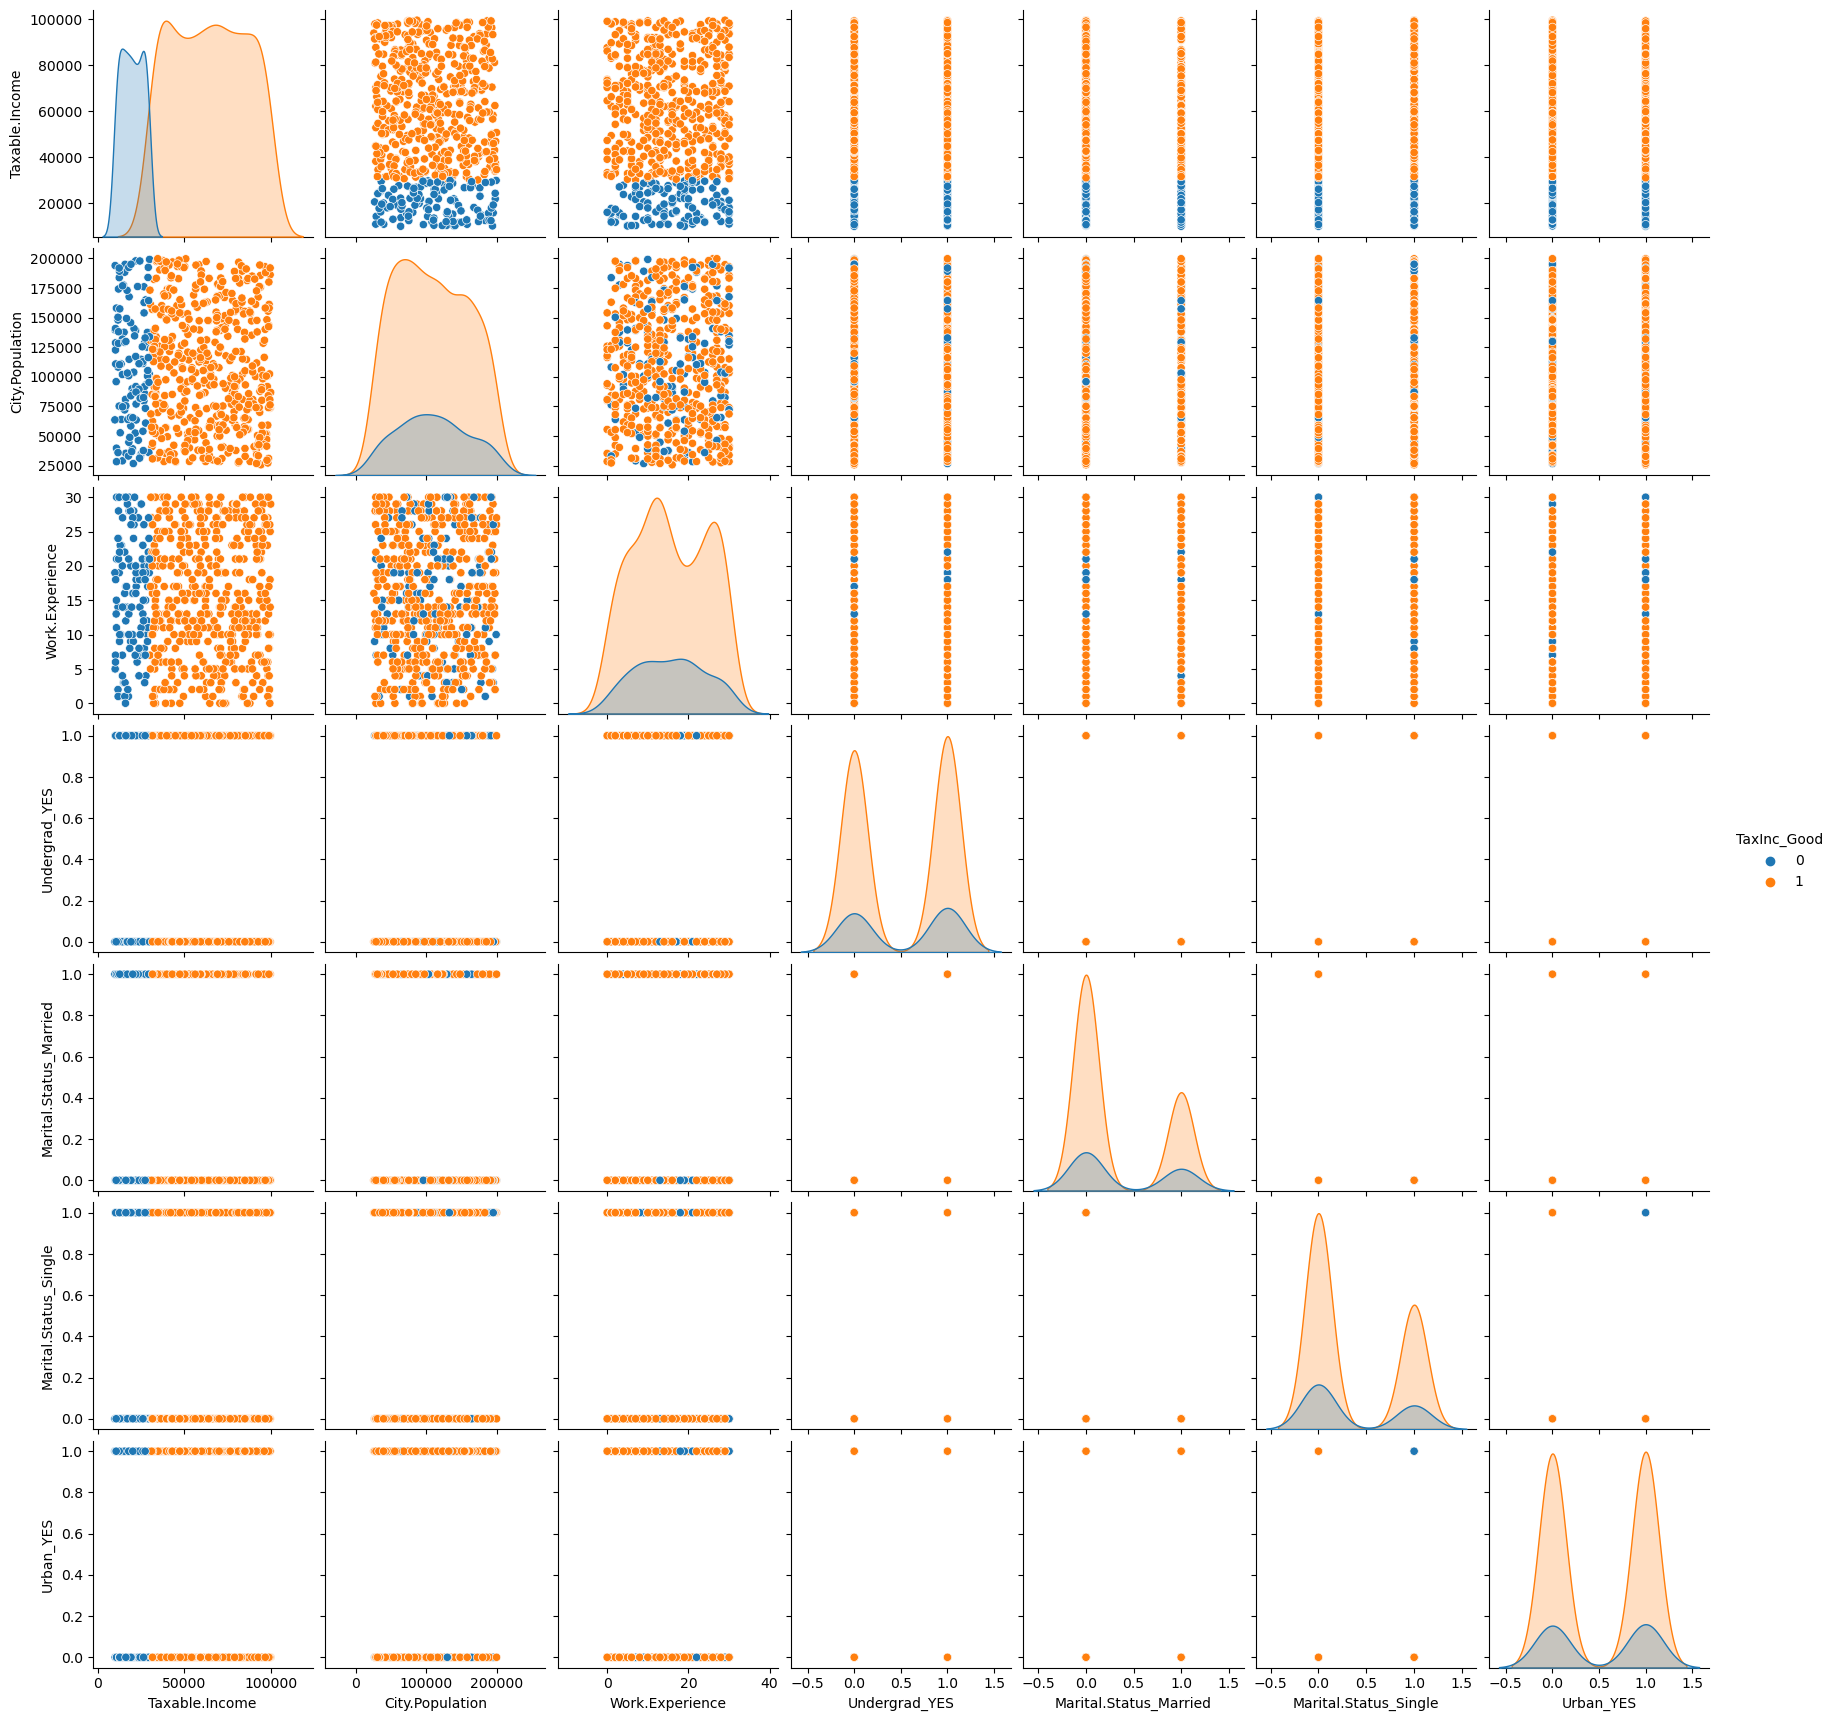

In [34]:
sns.pairplot(Fraud , hue='TaxInc_Good')
plt.show()

# Data Preprocessing

In [35]:
#Normalization function

def norm_func(i):
    x = (i-i.min())/(i.max() - i.min())
    return(x)

In [36]:
df = norm_func(Fraud.iloc[:,1:])

In [37]:
df

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [38]:
#Declaring dependent and independent variables
X = df.drop(['TaxInc_Good'], axis = 1)
Y = df['TaxInc_Good']

In [39]:
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [40]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

# Splitting Train and Test Data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
##Converting the Taxable income variable to bucketing. 
df["income"]="<=30000"
df.loc[Fraud["Taxable.Income"]>=30000,"income"]="Good"
df.loc[Fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [43]:
#Droping the Taxable income variable
Fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [44]:
Fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience"})

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [45]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [46]:
#Splitting the data into featuers and labels
features = Fraud.iloc[:,0:6].values
labels = Fraud.iloc[:,6].values

In [47]:
## Collecting the column names
colnames = list(Fraud.columns)
predictors = colnames[0:6]
target = colnames[6]
##Splitting the data into train and test

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [49]:
x_train

array([[ 55591,      0,      1,      1,      0,      1],
       [ 31156,     13,      0,      1,      0,      1],
       [ 59269,      6,      1,      0,      0,      0],
       ...,
       [117364,     11,      0,      0,      0,      0],
       [ 36861,     29,      0,      1,      0,      1],
       [128766,      5,      1,      0,      1,      1]], dtype=int64)

In [50]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [51]:
x_test

array([[126953,     30,      0,      0,      1,      1],
       [112591,     26,      1,      0,      1,      1],
       [115168,     30,      1,      0,      0,      0],
       [141622,     29,      1,      1,      0,      0],
       [115631,      5,      1,      1,      0,      0],
       [ 31641,     18,      1,      0,      1,      0],
       [190365,     28,      1,      1,      0,      0],
       [148246,      5,      1,      1,      0,      1],
       [161143,     17,      1,      0,      0,      0],
       [ 33184,      1,      0,      0,      0,      0],
       [192313,      5,      0,      1,      0,      1],
       [121498,     28,      1,      0,      1,      1],
       [147614,      9,      1,      0,      0,      1],
       [111105,      8,      0,      0,      1,      1],
       [ 98378,      3,      0,      0,      1,      1],
       [ 93390,      4,      1,      1,      0,      1],
       [ 34964,      2,      1,      0,      1,      0],
       [ 36956,     14,      1,

In [52]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=uint8)

# Random Forest Algorithm

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [54]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='gini', random_state= 42)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7395833333333333


In [56]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='entropy', random_state= 42)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7395833333333333


# Testing Random Forest Algorithm

In [58]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='gini', random_state= 42)

In [60]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=1000, random_state=42)

In [63]:
np.mean(y_test==predictions)

0.7833333333333333

In [64]:
pd.crosstab(y_test, predictions)

col_0,0,1
row_0,,
0,3,22
1,4,91
